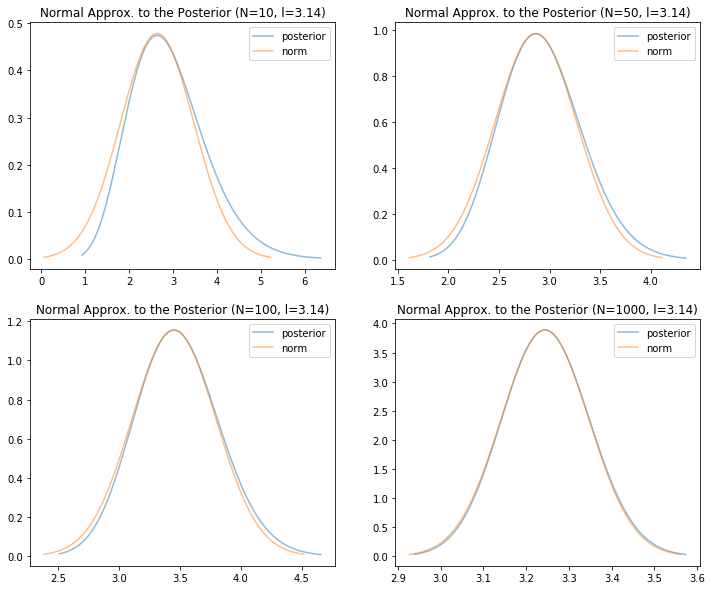

In [2]:
"""
Code from the readings in session 7.1
Source: http://bjlkeng.github.io/posts/normal-approximations-to-the-posterior-distribution/
"""

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as sts

lamb=3.14
plt.figure(1, figsize=(12, 10))
for n, pltnum in [(10, 221), (50, 222), (100, 223), (1000, 224)]:
    # Generate some samples from our "true distribution"
    y = sts.expon.rvs(scale=1/lamb, size=n)
    
    # Generate our posterior density
    # (Of course for a more complex model we would probably 
    #  draw samples instead of using the analytical form)
    alpha = n + 1
    beta = n * y.mean() + 1.
    post = sts.gamma(alpha, scale = 1. / beta)
    
    # Plot the posterior
    plt.subplot(pltnum)
    x = np.linspace(post.ppf(0.001), post.ppf(0.999), 1000)
    pd.Series(post.pdf(x), index=x).plot(alpha=0.5, label='posterior')
    
    # Generate our normal approximation
    mu = (alpha - 1.) / beta
    sigma2 = n / beta ** 2
    norm = sts.norm(loc=mu, scale=np.sqrt(sigma2))
    
    # Plot normal approximation
    x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
    pd.Series(norm.pdf(x), index=x).plot(alpha=0.5, label='norm')
    plt.title('Normal Approx. to the Posterior (N=%d, l=%.2f)' % (n, lamb))
    plt.legend(loc='best')

# Pre Class Work

## Question 1
Using the normal approximation to the binomial distribution, confirm that the 95% confidence interval for the sampling error for sample size 1000 and percentage outcome 10% is 2% (rounded to the nearest integer). Motivate why it is appropriate to use the binomial distribution here.

In [46]:
# Method 1
N, P1, P2 = 1000, .1, .02

sample = np.random.normal(loc = N*P1, scale = np.sqrt(N*P1*(1-P1)), size = 10**5)
print("For 10% percentage outcome: ",
      "{0:.2%}".format((np.percentile(sample, [2.5, 97.5])[1] - N*P1)/N))

sample = np.random.normal(loc = N*P2, scale = np.sqrt(N*P2*(1-P2)), size = 10**5)
print("For 10% percentage outcome: ",
      "{0:.2%}".format((np.percentile(sample, [2.5, 97.5])[1] - N*P2)/N))

For 10% percentage outcome:  1.87%
For 10% percentage outcome:  0.86%


In [45]:
# Methond 2
n, p1, p2 = 1000, .1, .02

dist = sts.norm(loc = n*p1, scale = np.sqrt(n*p1*(1-p1)))
sample1 = dist.rvs(size=10**5)
print("For 10% percentage outcome: ",
      "{0:.2%}".format((dist.interval(0.95)[1] - n*p1)/n))


dist = sts.norm(loc = n*p2, scale = np.sqrt(n*p2*(1-p2)))
sample1 = dist.rvs(size=10**5)
print("For 2% percentage outcome: ",
      "{0:.2%}".format((dist.interval(0.95)[1] - n*p2)/n))

For 10% percentage outcome:  1.86%
For 2% percentage outcome:  0.87%


In [48]:
# Analytical
print("For 10% percentage outcome: ",
      "{0:.2%}".format(1.96*np.sqrt(n*p1*(1-p1))/n))

print("For 2% percentage outcome: ",
      "{0:.2%}".format(1.96*np.sqrt(n*p2*(1-p2))/n))

For 10% percentage outcome:  1.86%
For 2% percentage outcome:  0.87%


## Question 2
Write a Python function for calculating the 95% confidence interval given any sample size and any percentage outcome. Use your function to calculate all the values in the Total Survey Error table rounded to the nearest integer. For which entries does your margin of error differ from the value in the table?

In [76]:
def conf_interval(N, p):
    dist = sts.norm(loc=p, scale=np.sqrt(p*(1-p)/N))
    return '{0:.0%}'.format(dist.interval(0.95)[1]-p)

conf_interval(1000, .1)

N_list = [1000, 750, 500, 250, 100]
p_list = [.1, .2, .3, .4, .5, .6, .7, .8, .9]

for i in p_list:
    for j in N_list:
        print(conf_interval(j, i), end="  ")
    print()

2%  2%  3%  4%  6%  
2%  3%  4%  5%  8%  
3%  3%  4%  6%  9%  
3%  4%  4%  6%  10%  
3%  4%  4%  6%  10%  
3%  4%  4%  6%  10%  
3%  3%  4%  6%  9%  
2%  3%  4%  5%  8%  
2%  2%  3%  4%  6%  


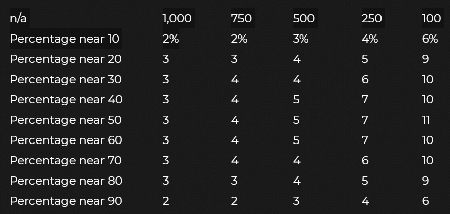

The difference between the results from the Public Opinion Research and the ones computed using the function above: